In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#读取数据
df=pd.read_csv("File_Classify.csv",encoding="gbk")
'''constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df)
constant_columns=[column for column in df.columns
                  if column not in df.columns[constant_filter.get_support()]]
df.drop(labels=constant_columns,axis=1,inplace=True)'''

# 数据预处理

df1 = df[df.columns[1:]]  # 获得数据域内容的数据
ss = MinMaxScaler()
ss.fit(df1)
df1= pd.DataFrame(ss.transform(df1), columns=df1.columns)


df2 = pd.DataFrame(df[df.columns[0]])    # 获得 时间间隔内容  数据    
ss2 = MinMaxScaler()
ss2.fit(df2)
df2 = pd.DataFrame(ss2.transform(df2), columns=df2.columns)

df2 = df2['timestamp']

#制作 数据域内容的 数据集
traindate=[]
target=[]
for i in range(6,df1.shape[0]):
    tmp=[]
    for j in range(i-6,i):
        tmp.append(list(df1.loc[j]))
    
    traindate.append(tmp)
    target.append(list(df1.loc[i]))

traindate=np.array(traindate)
target=np.array(target)

print('train.shape:',traindate.shape)
print('target.shape:',target.shape)

# 交叉验证 
#X_train,X_test,y_train,y_test =cross_validation.train_test_split(traindate, target, test_size=0.2,random_state=0)

X_train,X_test,y_train,y_test=train_test_split(traindate,target,test_size=0.2,random_state=165)
print("x_test")

# 时间间隔 训练数据集生成
ttraindate=[]
ttarget=[]
for i in range(6,df2.shape[0]):
    tmp=[]
    for j in range(i-6,i):
        tmp.append(list([df2.loc[j]]))
    
    ttraindate.append(tmp)
    ttarget.append(list([df2.loc[i]]))

ttraindate=np.array(ttraindate)
ttarget=np.array(ttarget)

TX_train,TX_test,ty_train,ty_test=train_test_split(ttraindate,ttarget,test_size=0.2,random_state=165)

train.shape: (32672, 6, 4)
target.shape: (32672, 4)
x_test


6535/6535 [==============================] - 4s 564us/sample - loss: 4.9717e-04 - mean_absolute_error: 0.0127 - mean_squared_error: 4.9717e-04
0 条数据


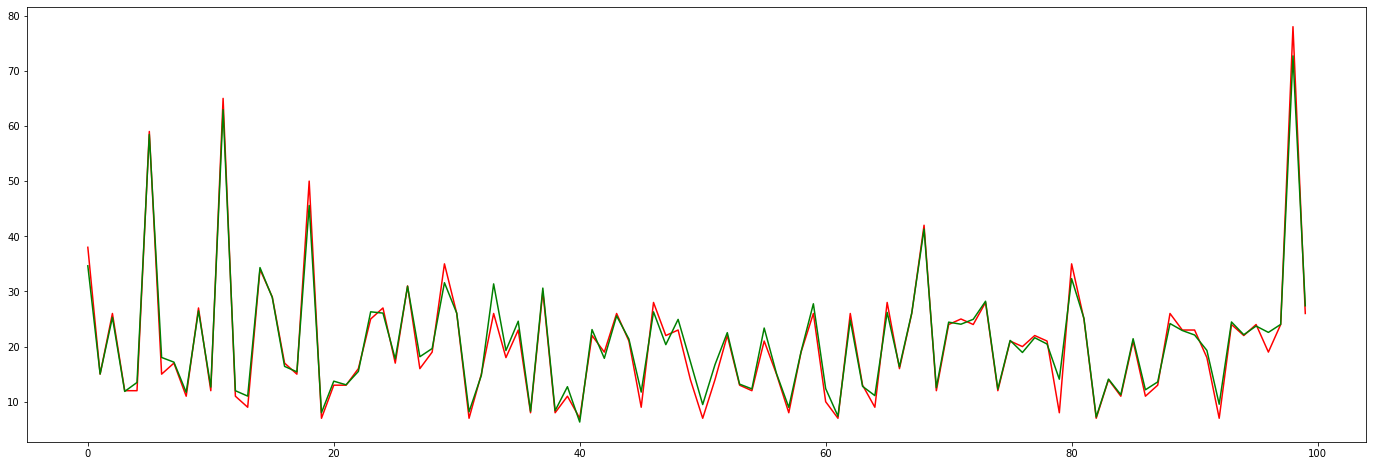

1 条数据


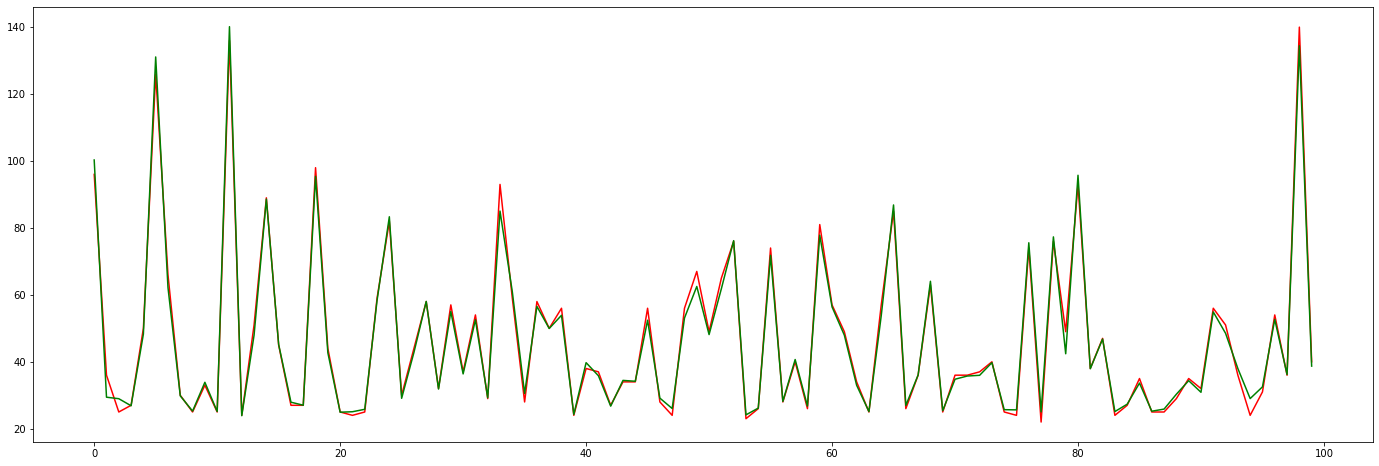

2 条数据


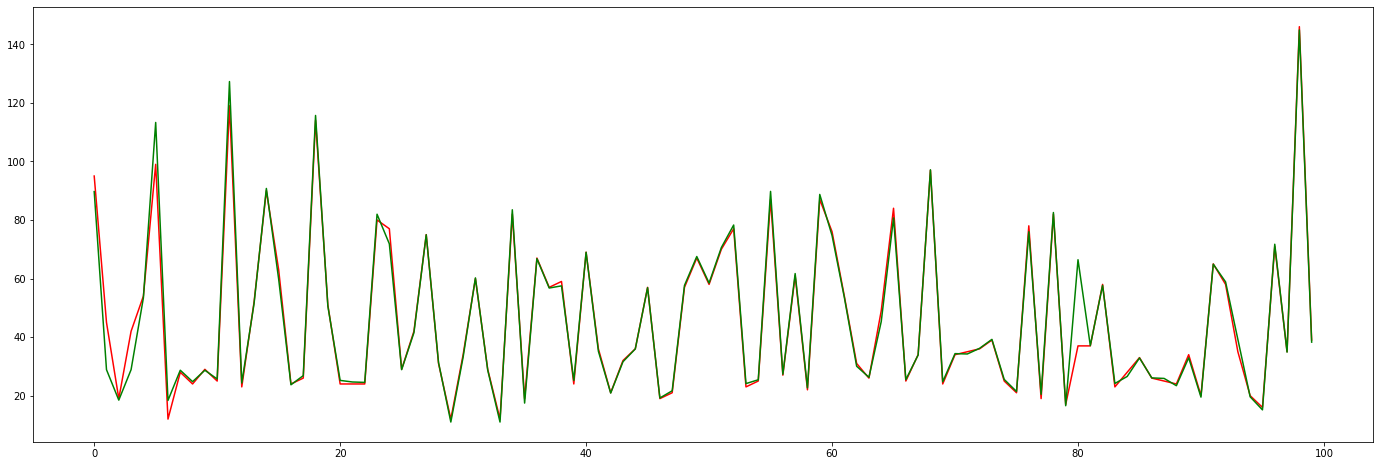

3 条数据


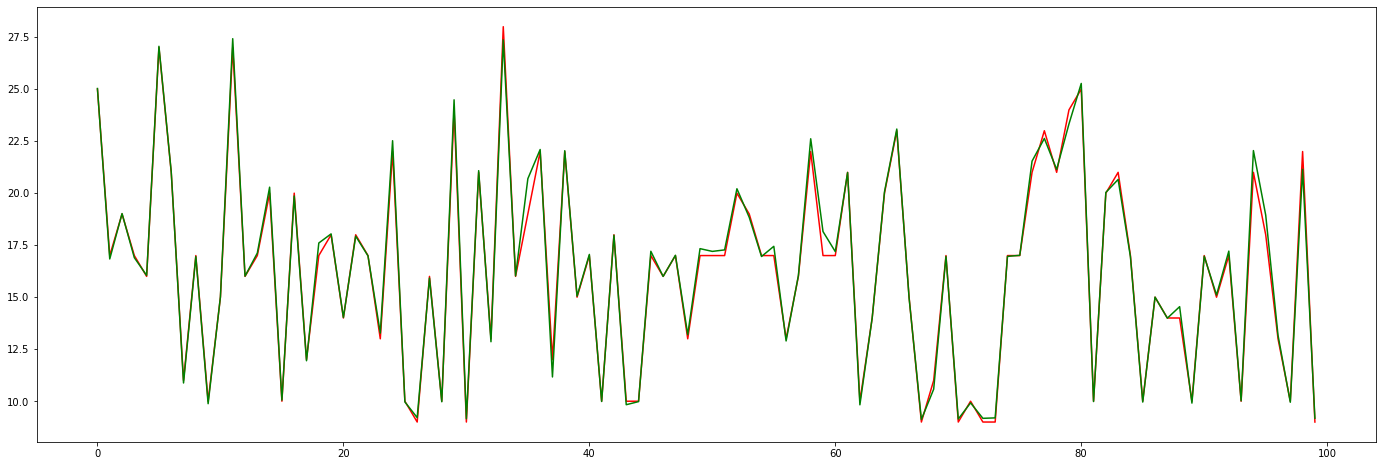

In [28]:
# Test
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

#model_new=load_model("File_Classify.hdf5")  #加载最好的模型
model_new=load_model("last_4.hdf5")

model_new.evaluate( X_test, y_test)  #计算测试集的val_loss
y_pre=np.squeeze(model_new.predict( X_test))

y_pre = ss.inverse_transform(y_pre)
y_testt = ss.inverse_transform(y_test)
for i in range(4):
    print (i,"条数据")
    plt.figure(figsize=(24,8))
    plt.plot(y_testt[:,i][:100], c='red')
    plt.plot(y_pre[:,i][:100], c='g')
    plt.show()
    plt.close()


In [15]:
df=pd.read_csv('0x260.csv',encoding="gbk")
constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(df)
constant_columns=[column for column in df.columns
                if column not in df.columns[constant_filter.get_support()]]

df.drop(labels=constant_columns,axis=1,inplace=True)
df1=df[df.columns[1:]]
ss=MinMaxScaler()
ss.fit(df1)
df1=pd.DataFrame(ss.transform(df1))

traindate=[]
target=[]
for i in range(6,df1.shape[0]):
    tmp=[]
    for j in range(i-6,i):
        tmp.append(list(df1.loc[i]))
    
    traindate.append(tmp)
    target.append(list(df1.loc[i]))
    
traindate=np.array(traindate)
taeget=np.array(target)

X_test=traindate
y_test=target

model_new=load_model("filter_1.hdf5")
model_new.evaluate(X_test,y_test)
y_pre=np.squeeze(model_new.predict(X_test))

y_pre=ss.inverse_transform(y_pre)
y_test=ss.inverse_transform(y_test)
for i in range(6):
    plt.figure(figsize=(24,8))
    plt.plot(y_test[:,i][:2000],c='red')
    plt.plot(y_pre[:,i][:2000],c='green')
    plt.show()
    plt.close()

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 13051 arrays: [array([[0.85714286],
       [0.94573643],
       [0.94890511],
       [0.76190476],
       [0.37762238],
       [0.83464567]]), array([[0.83116883],
       [0.94573643],
       [0.94890511],
       [...

6535/6535 [==============================] - 3s 401us/sample - loss: 0.0025 - mean_absolute_error: 0.0231 - mean_squared_error: 0.0025


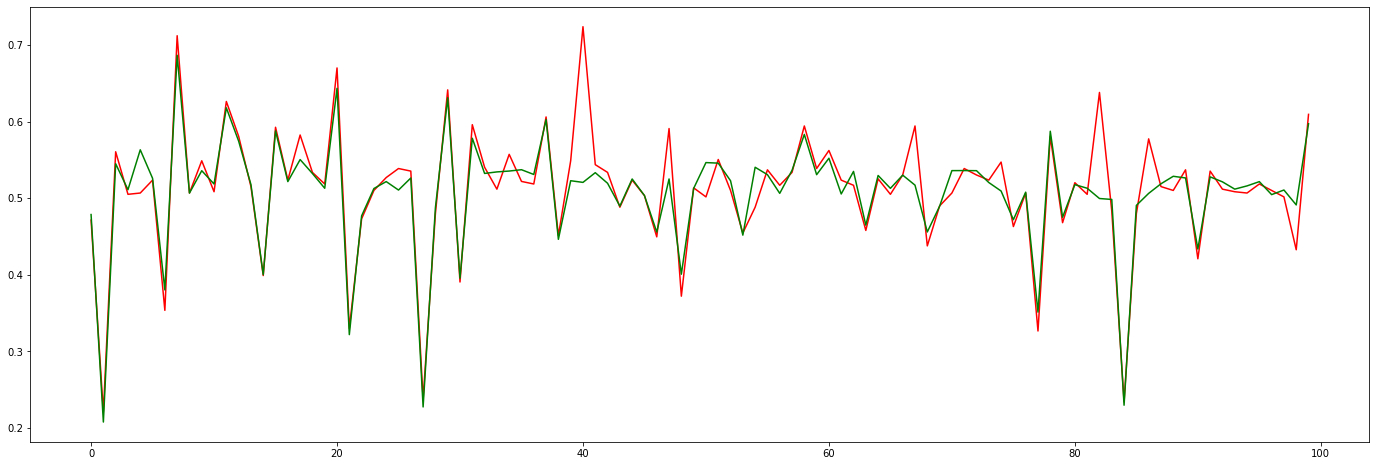

In [12]:
# Test
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

'''lay_names = []
for lay in model_new.layers:
    lay_names.append(lay.name)'''

model_new2 = load_model("filter_2 .hdf5")  #加载最好的模型
model_new2.evaluate(TX_test, ty_test)  #计算测试集的val_loss
y_pre=np.squeeze(model_new2.predict(TX_test))
#print(y_pre[170:270].shape)
#print(y_testt[170:270].shape)
#y_pre = ss2.inverse_transform(y_pre.reshape(-1, 1))
#y_testt = ss2.inverse_transform(ty_test)

plt.figure(figsize=(24,8))
plt.plot(ty_test[170:270], c='red')
plt.plot(y_pre[170:270], c='g')
plt.show()
plt.close()


In [11]:
## your test_data

from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
import datetime
import pandas as pd

loss1 = 0.014
loss2 = 0.0279
w1 = 2
w2 = 2

model_new=load_model("test_2.hdf5")  #加载最好的模型
model_new2 = load_model("test_1.hdf5")


df = pd.read_csv('obo_test.csv', encoding="gbk")
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df)
constant_columns=[column for column in df.columns
                  if column not in df.columns[constant_filter.get_support()]]
df.drop(labels=constant_columns,axis=1,inplace=True)

df1 = df[df.columns[1:]]
df1= pd.DataFrame(ss.transform(df1), columns=df1.columns)

df2 = pd.DataFrame(df[df.columns[0]])
df2 = pd.DataFrame(ss2.transform(df2), columns=df2.columns)
df2 = df2['timestamp']
cnt=1
for i in range(6,df1.shape[0]):
    tmp1 = []
    tmp2 = []
    for j in range(i-6,i):
        tmp1.append(list(df1.loc[j]))
        tmp2.append(list([df2.loc[j]]))
        
        
    pre_data = model_new.predict(np.array(tmp1).reshape(-1, 6, 6))
    loss_data = mean_absolute_error(pre_data[0],list(df1.loc[i]))
    
    pre_time = model_new2.predictnp.array(tmp2).reshape(-1, 6, 1))
    loss_time = mean_absolute_error(pre_time, list([df2.loc[i]])) 
    
    print('ture_time:', list([df2.loc[i]])[0], end = ' ')
    print('ture_data:', list(df1.loc[i]))
    curr_time = datetime.datetime.now().second
    if loss_data < w1*loss1:
        if loss_time < w2*loss2:
            print('pre_time:', pre_time[0][0], end = ' ')
            print('pre_data:', pre_data)
            cnt+=1
            time=datetime.datetime.now().second-curr_time
            print('timt1:=',time)
    if loss_time<w2*loss2:
          if loss_data< w1*loss1:
                print("...")
                cnt+=1
                time2=datetime.datetime.now().second-curr_time
                print('time2:=',time2)
    else:
        break
print(cnt)

ValueError: Error when checking input: expected input_5 to have shape (6, 6) but got array with shape (6, 1)

In [10]:
#模型训练
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import *
import numpy as np
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
import keras
import pandas as pd
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

from sklearn.model_selection import GridSearchCV, KFold
from IPython.display import display
from sklearn.metrics import mean_squared_error,r2_score,make_scorer

'''
def attention_3d_block(inputs):
    
    input_dim = int(inputs.shape[2]) 
    a = Permute((2, 1))(inputs)           #将 timesteps 与 input_dim 维对换 
    a = Reshape((input_dim, X_train.shape[1]))(a)        
    a = Dense(X_train.shape[1], activation='softmax')(a)    #  Dense层的激活函数是softmax，得到注意力权重，然后与原数据相乘
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul
'''
def attention_3d_block(inputs, single_attention_vector=False):
    # inputs.shape = (batch_size, time_steps, input_dim)
    time_steps = K.int_shape(inputs)[1]
    input_dim = K.int_shape(inputs)[2]
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    if single_attention_vector:
        a = Lambda(lambda x: K.mean(x, axis=1))(a)
        a = RepeatVector(input_dim)(a)

    a_probs = Permute((2, 1))(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul    

# Model for DataDomin
callbacks = [EarlyStopping(monitor='val_loss', verbose=1, patience=200),
			 ModelCheckpoint("last_1.hdf5", monitor='val_mean_absolute_error',
							 mode='min', verbose=0, save_best_only=True)]   

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))      # 步长、维度 
x = Conv1D(filters = 32, kernel_size = 1, activation = 'relu')(inputs)
#x= MaxPooling1D(pool_size=2)(x)
#x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones')

x = Bidirectional(LSTM(48, return_sequences=True))(x)  
x= attention_3d_block(x)

x = Dropout(0.2)(x)
x = Flatten()(x)

x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

output = Dense(target.shape[1], activation='relu')(x)
model = Model(inputs=[inputs ], outputs=output)

model.compile(loss='mean_squared_error', optimizer='adam',metrics =['mae','mse'])
model.summary()  
history = model.fit(X_train, y_train, epochs=200, batch_size=2000, callbacks=callbacks,validation_data=( X_test, y_test), verbose=1)

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

#lt.plot(history2.history['loss'],label='timedomian',color='green')
plt.legend()
#plt.savefig('./loss.svg',format='svg')
plt.show() 


D:\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass scoring=make_scorer(mean_squared_error) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


TypeError: Cannot clone object '<tensorflow.python.keras.engine.training.Model object at 0x00000196CE9BC108>' (type <class 'tensorflow.python.keras.engine.training.Model'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [11]:
# Model for TimeDomin

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,Callback
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

def attention_3d_block(inputs):
    input_dim = int(inputs.shape[2]) 

    a = inputs      
    a = Dense(input_dim, activation='softmax')(a)
    a_probs = Permute((1,2), name='attention_vec')(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

callbacks2 = [EarlyStopping(monitor='val_loss', verbose=1, patience=150),
			 ModelCheckpoint("test_test.hdf5", monitor='val_mean_absolute_error',
							 mode='min', verbose=0, save_best_only=True)]   
sess=tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
  
inputs = Input(shape=(TX_train.shape[1], TX_train.shape[2]))  
#x2=Conv1D(filters=32,kernel_size=1,activation='relu')(inputs)
context1 = Bidirectional(LSTM(48, return_sequences=True))(inputs)
atten = attention_3d_block(context1)
#atten=Conv1D(filters=32,kernel_size=3,activation='relu')(atten)
#atten=Conv1D(filters=16,kernel_size=3,activation='relu')(atten)
#atten=GlobalMaxPooling1D()(atten)
drop = Dropout(0.2)(atten)
x2 = Flatten()(drop)

x2= Dense(256,activation='relu')(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(32, activation='relu')(x2)

output2 = Dense(ttarget.shape[1], activation='relu')(x2)

model2 = Model(inputs=inputs, outputs=output2)
model2.compile(loss='mean_squared_error', optimizer='adam',metrics =['mae','mse'])
model2.summary() 

history2 = model2.fit(TX_train, ty_train, epochs=200, batch_size=2000, callbacks=callbacks2,validation_data=(TX_test, ty_test), verbose=1)


plt.figure()
plt.plot(history2.history['loss'], label='1')
#plt.plot(history2.history['val_loss'], label='test')
#plt.legend()
#plt.show()


plt.plot(history.history['loss'], label='2',color='red')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 6, 1)]       0                                            
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 6, 96)        19200       input_5[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 6, 96)        9312        bidirectional_4[0][0]            
__________________________________________________________________________________________________
attention_vec (Permute)         (None, 6, 96)        0           dense_12[0][0]                   
____________________________________________________________________________________________

KeyboardInterrupt: 

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 6, 4)]            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 6, 32)             160       
_________________________________________________________________
bidirectional_5 (Bidirection (None, 6, 96)             31104     
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 96)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                36928     
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 260 

Epoch 65/200
26137/26137 [==============================] - 7s 266us/sample - loss: 0.0205 - mean_absolute_error: 0.0622 - mean_squared_error: 0.0205 - val_loss: 0.0207 - val_mean_absolute_error: 0.0600 - val_mean_squared_error: 0.0207
Epoch 66/200
26137/26137 [==============================] - 6s 220us/sample - loss: 0.0205 - mean_absolute_error: 0.0623 - mean_squared_error: 0.0205 - val_loss: 0.0207 - val_mean_absolute_error: 0.0599 - val_mean_squared_error: 0.0207
Epoch 67/200
26137/26137 [==============================] - 7s 260us/sample - loss: 0.0205 - mean_absolute_error: 0.0622 - mean_squared_error: 0.0205 - val_loss: 0.0207 - val_mean_absolute_error: 0.0598 - val_mean_squared_error: 0.0207
Epoch 68/200
26137/26137 [==============================] - 6s 247us/sample - loss: 0.0205 - mean_absolute_error: 0.0621 - mean_squared_error: 0.0205 - val_loss: 0.0207 - val_mean_absolute_error: 0.0599 - val_mean_squared_error: 0.0207
Epoch 69/200
26137/26137 [==============================

Epoch 100/200
26137/26137 [==============================] - 5s 195us/sample - loss: 0.0204 - mean_absolute_error: 0.0614 - mean_squared_error: 0.0204 - val_loss: 0.0206 - val_mean_absolute_error: 0.0599 - val_mean_squared_error: 0.0206
Epoch 101/200
26137/26137 [==============================] - 5s 189us/sample - loss: 0.0204 - mean_absolute_error: 0.0614 - mean_squared_error: 0.0204 - val_loss: 0.0206 - val_mean_absolute_error: 0.0591 - val_mean_squared_error: 0.0206
Epoch 102/200
26137/26137 [==============================] - 6s 218us/sample - loss: 0.0204 - mean_absolute_error: 0.0612 - mean_squared_error: 0.0204 - val_loss: 0.0206 - val_mean_absolute_error: 0.0593 - val_mean_squared_error: 0.0206
Epoch 103/200
26137/26137 [==============================] - 5s 208us/sample - loss: 0.0204 - mean_absolute_error: 0.0613 - mean_squared_error: 0.0204 - val_loss: 0.0206 - val_mean_absolute_error: 0.0593 - val_mean_squared_error: 0.0206
Epoch 104/200
26137/26137 [=========================

Epoch 169/200
26137/26137 [==============================] - 4s 154us/sample - loss: 0.0204 - mean_absolute_error: 0.0605 - mean_squared_error: 0.0204 - val_loss: 0.0206 - val_mean_absolute_error: 0.0589 - val_mean_squared_error: 0.0206
Epoch 170/200
26137/26137 [==============================] - 4s 150us/sample - loss: 0.0204 - mean_absolute_error: 0.0604 - mean_squared_error: 0.0204 - val_loss: 0.0206 - val_mean_absolute_error: 0.0594 - val_mean_squared_error: 0.0206
Epoch 171/200
26137/26137 [==============================] - 4s 153us/sample - loss: 0.0204 - mean_absolute_error: 0.0604 - mean_squared_error: 0.0204 - val_loss: 0.0206 - val_mean_absolute_error: 0.0591 - val_mean_squared_error: 0.0206
Epoch 172/200
26137/26137 [==============================] - 4s 149us/sample - loss: 0.0204 - mean_absolute_error: 0.0604 - mean_squared_error: 0.0204 - val_loss: 0.0206 - val_mean_absolute_error: 0.0592 - val_mean_squared_error: 0.0206
Epoch 173/200
26137/26137 [=========================

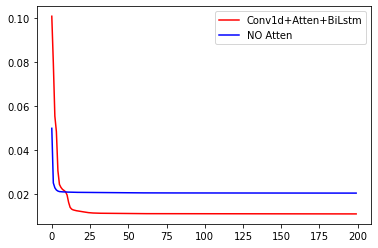

In [23]:
# without attention
callbacks = [EarlyStopping(monitor='val_loss', verbose=1, patience=200),
             ModelCheckpoint("last_2.hdf5",monitor='val_mean_absolute_error',
                            mode='min',verbose=0,save_best_only=True)]

inputs=Input(shape=(X_train.shape[1],X_train.shape[2]))

x=Conv1D(filters=32,kernel_size=3,activation='relu')(inputs)
x= MaxPooling1D(pool_size=2)(x)

x=Bidirectional(LSTM(48,return_sequences=True))(x)
#x=attention_3d_block(x)
x=Dropout(0.2)(x)
x=Flatten()(x)

x=Dense(64,activation='relu')(x)
#x =Dense(32,activation='relu')(x)

output=Dense(target.shape[1],activation='relu')(x)
model_3=Model(inputs=[inputs ],outputs=output)
model_3.compile(loss='mean_squared_error', optimizer='adam',metrics =['mae','mse'])   
model_3.summary()  

history_3 = model_3.fit(X_train, y_train, epochs=200, batch_size=2000, callbacks=callbacks,validation_data=( X_test, y_test), verbose=1)

plt.figure()
#plt.plot(history.history['loss'], label='Conv1d+Atten+BiLstm',color='red')
plt.plot(history_3.history['loss'], label='NO Atten',color='blue')
plt.legend()
plt.show() 

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 6, 4)]            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 6, 48)             10176     
_________________________________________________________________
lstm_4 (LSTM)                (None, 6, 48)             18624     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 48)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                18496     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080

Epoch 29/100
26137/26137 [==============================] - 2s 71us/sample - loss: 8.0628e-04 - mean_absolute_error: 0.0172 - mean_squared_error: 8.0628e-04 - val_loss: 5.9279e-04 - val_mean_absolute_error: 0.0125 - val_mean_squared_error: 5.9279e-04
Epoch 30/100
26137/26137 [==============================] - 2s 72us/sample - loss: 8.0339e-04 - mean_absolute_error: 0.0171 - mean_squared_error: 8.0339e-04 - val_loss: 5.8493e-04 - val_mean_absolute_error: 0.0127 - val_mean_squared_error: 5.8493e-04
Epoch 31/100
26137/26137 [==============================] - 2s 74us/sample - loss: 7.9396e-04 - mean_absolute_error: 0.0170 - mean_squared_error: 7.9396e-04 - val_loss: 5.7428e-04 - val_mean_absolute_error: 0.0122 - val_mean_squared_error: 5.7428e-04
Epoch 32/100
26137/26137 [==============================] - 2s 73us/sample - loss: 7.6941e-04 - mean_absolute_error: 0.0167 - mean_squared_error: 7.6941e-04 - val_loss: 5.6592e-04 - val_mean_absolute_error: 0.0121 - val_mean_squared_error: 5.6592e

Epoch 62/100
26137/26137 [==============================] - 2s 70us/sample - loss: 5.6634e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 5.6634e-04 - val_loss: 4.3824e-04 - val_mean_absolute_error: 0.0108 - val_mean_squared_error: 4.3824e-04
Epoch 63/100
26137/26137 [==============================] - 2s 72us/sample - loss: 5.6239e-04 - mean_absolute_error: 0.0141 - mean_squared_error: 5.6239e-04 - val_loss: 4.3663e-04 - val_mean_absolute_error: 0.0108 - val_mean_squared_error: 4.3663e-04
Epoch 64/100
26137/26137 [==============================] - 2s 70us/sample - loss: 5.5820e-04 - mean_absolute_error: 0.0141 - mean_squared_error: 5.5820e-04 - val_loss: 4.2747e-04 - val_mean_absolute_error: 0.0107 - val_mean_squared_error: 4.2747e-04
Epoch 65/100
26137/26137 [==============================] - 2s 73us/sample - loss: 5.5456e-04 - mean_absolute_error: 0.0141 - mean_squared_error: 5.5456e-04 - val_loss: 4.2904e-04 - val_mean_absolute_error: 0.0108 - val_mean_squared_error: 4.2904e

Epoch 95/100
26137/26137 [==============================] - 2s 81us/sample - loss: 4.2412e-04 - mean_absolute_error: 0.0127 - mean_squared_error: 4.2412e-04 - val_loss: 3.0618e-04 - val_mean_absolute_error: 0.0093 - val_mean_squared_error: 3.0618e-04
Epoch 96/100
26137/26137 [==============================] - 2s 79us/sample - loss: 4.1045e-04 - mean_absolute_error: 0.0124 - mean_squared_error: 4.1045e-04 - val_loss: 3.1964e-04 - val_mean_absolute_error: 0.0102 - val_mean_squared_error: 3.1964e-04
Epoch 97/100
26137/26137 [==============================] - 2s 82us/sample - loss: 4.1764e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 4.1764e-04 - val_loss: 3.2067e-04 - val_mean_absolute_error: 0.0096 - val_mean_squared_error: 3.2067e-04
Epoch 98/100
26137/26137 [==============================] - 2s 75us/sample - loss: 4.2039e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 4.2039e-04 - val_loss: 3.0461e-04 - val_mean_absolute_error: 0.0094 - val_mean_squared_error: 3.0461e

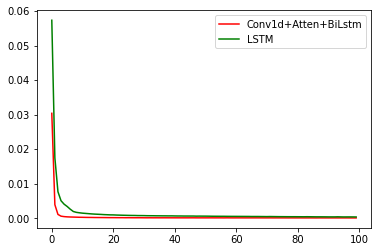

In [5]:
# only use two LSTM layers

callbacks = [EarlyStopping(monitor='val_loss', verbose=1, patience=1111),
			 ModelCheckpoint("last_3.hdf5", monitor='val_mean_absolute_error',
							 mode='min', verbose=0, save_best_only=True)]   

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))    # 6x9
context1=LSTM(48,return_sequences=True)(inputs)
context1=LSTM(48,return_sequences=True)(context1)

#atten = attention_3d_block(context1)
drop=Dropout(0.2)(context1)
x = Flatten()(drop)    #Flatten层，把多维的输入一维化

x = Dense(64, activation='relu')(x)
x=Dense(32,activation='relu')(x)

output = Dense(target.shape[1], activation='relu')(x)  
model_4 = Model(inputs=[inputs], outputs=output)
model_4.compile(loss='mean_squared_error', optimizer='adam',metrics =['mae','mse'])   
model_4.summary()  

history_4 = model_4.fit(X_train, y_train, epochs=100, batch_size=2000, callbacks=callbacks,validation_data=( X_test, y_test), verbose=1)


plt.figure()
plt.plot(history.history['loss'], label='Conv1d+Atten+BiLstm',color='red')
#plt.plot(history_3 .history['loss'], label='No Atten',color='blue')
plt.plot(history_4.history['loss'],label='LSTM',color='green')
plt.legend()
plt.show() 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 6, 4)]       0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 6, 96)        20352       input_1[0][0]                    
_______________________________________________________

Epoch 16/200
26137/26137 [==============================] - 3s 103us/sample - loss: 4.3534e-04 - mean_absolute_error: 0.0124 - mean_squared_error: 4.3534e-04 - val_loss: 4.4772e-04 - val_mean_absolute_error: 0.0121 - val_mean_squared_error: 4.4772e-04
Epoch 17/200
26137/26137 [==============================] - 3s 97us/sample - loss: 4.0777e-04 - mean_absolute_error: 0.0118 - mean_squared_error: 4.0777e-04 - val_loss: 4.2400e-04 - val_mean_absolute_error: 0.0117 - val_mean_squared_error: 4.2400e-04
Epoch 18/200
26137/26137 [==============================] - 3s 98us/sample - loss: 3.8962e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 3.8962e-04 - val_loss: 4.1314e-04 - val_mean_absolute_error: 0.0113 - val_mean_squared_error: 4.1314e-04
Epoch 19/200
26137/26137 [==============================] - 3s 114us/sample - loss: 3.7500e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 3.7500e-04 - val_loss: 3.8904e-04 - val_mean_absolute_error: 0.0109 - val_mean_squared_error: 3.890

Epoch 81/200
26137/26137 [==============================] - 3s 116us/sample - loss: 1.7414e-04 - mean_absolute_error: 0.0065 - mean_squared_error: 1.7414e-04 - val_loss: 1.8871e-04 - val_mean_absolute_error: 0.0067 - val_mean_squared_error: 1.8871e-04
Epoch 82/200
26137/26137 [==============================] - 3s 109us/sample - loss: 1.6998e-04 - mean_absolute_error: 0.0063 - mean_squared_error: 1.6998e-04 - val_loss: 1.8217e-04 - val_mean_absolute_error: 0.0061 - val_mean_squared_error: 1.8217e-04
Epoch 83/200
26137/26137 [==============================] - 3s 109us/sample - loss: 1.6765e-04 - mean_absolute_error: 0.0062 - mean_squared_error: 1.6765e-04 - val_loss: 1.8730e-04 - val_mean_absolute_error: 0.0066 - val_mean_squared_error: 1.8730e-04
Epoch 84/200
26137/26137 [==============================] - 3s 106us/sample - loss: 1.6866e-04 - mean_absolute_error: 0.0063 - mean_squared_error: 1.6866e-04 - val_loss: 1.7940e-04 - val_mean_absolute_error: 0.0063 - val_mean_squared_error: 1.7

26137/26137 [==============================] - 2s 94us/sample - loss: 1.4446e-04 - mean_absolute_error: 0.0059 - mean_squared_error: 1.4446e-04 - val_loss: 1.6503e-04 - val_mean_absolute_error: 0.0066 - val_mean_squared_error: 1.6503e-04
Epoch 146/200
26137/26137 [==============================] - 2s 93us/sample - loss: 1.3769e-04 - mean_absolute_error: 0.0055 - mean_squared_error: 1.3769e-04 - val_loss: 1.4618e-04 - val_mean_absolute_error: 0.0054 - val_mean_squared_error: 1.4618e-04
Epoch 147/200
26137/26137 [==============================] - 2s 93us/sample - loss: 1.3561e-04 - mean_absolute_error: 0.0053 - mean_squared_error: 1.3561e-04 - val_loss: 1.4675e-04 - val_mean_absolute_error: 0.0054 - val_mean_squared_error: 1.4675e-04
Epoch 148/200
26137/26137 [==============================] - 3s 104us/sample - loss: 1.3587e-04 - mean_absolute_error: 0.0054 - mean_squared_error: 1.3587e-04 - val_loss: 1.4469e-04 - val_mean_absolute_error: 0.0051 - val_mean_squared_error: 1.4469e-04
Epoch

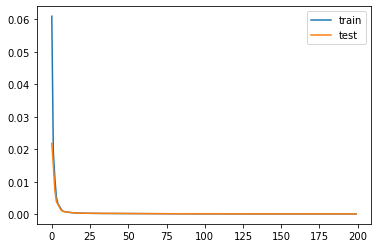

In [3]:
# without Conv1D layer

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

callbacks = [EarlyStopping(monitor='val_loss', verbose=1, patience=1111),
			 ModelCheckpoint("last_10.hdf5", monitor='val_mean_absolute_error',
							 mode='min', verbose=0, save_best_only=True)]   

def attention_3d_block(inputs):
    input_dim = int(inputs.shape[2]) 

    a = Permute((2, 1))(inputs)          
    a = Reshape((input_dim, 6))(a)  
    a = Dense(6, activation='softmax')(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))  
context1 = Bidirectional(LSTM(48, return_sequences=True))(inputs)  
atten = attention_3d_block(context1)
drop=Dropout(0.2)(atten)
atten = Flatten()(atten)    #Flatten层，把多维的输入一维化

x=Dense(64, activation='relu')(atten)
x=Dense(32, activation='relu')(x)

output = Dense(target.shape[1], activation='relu')(x)  
model_2 = Model(inputs=[inputs], outputs=output)
model_2.compile(loss='mean_squared_error', optimizer='adam',metrics =['mae','mse'])   
model_2.summary()  

history_2 = model_2.fit(X_train, y_train, epochs=200, batch_size=1500, callbacks=callbacks,validation_data=( X_test, y_test), verbose=1)

plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='test')
plt.legend()
plt.show() 

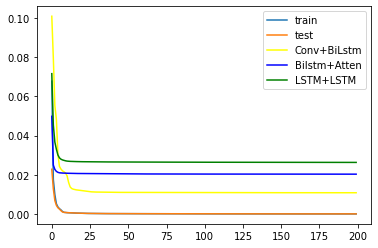

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_2['loss'],label='train')
plt.plot(history_2['val_loss'],label='test')

plt.plot(history['loss'], label='Conv+BiLstm',color='yellow')
plt.plot(history_3['loss'], label='Bilstm+Atten',color='blue')
plt.plot(history_4['loss'],label='LSTM+LSTM',color='green')

plt.legend()
#plt.savefig('./result_260.svg',format='svg')
plt.show() 


In [29]:
import pickle
file_4 = open('history_4.pkl', 'wb')
pickle.dump(history_4.history, file_4)
file_2=open('history_2.pkl','wb')
pickle.dump(history_2.history,file_2)
file_test=open('history_test.pkl','wb')
pickle.dump(history.history,file_test)
file_3=open('history_3.pkl','wb')
pickle.dump(history_3.history,file_3)

file_4.close()
file_2.close()
file_3.close()
file_test.close()

In [2]:
import pickle

with open('history_test.pkl','rb') as file_test:
    history=pickle.load(file_test)
    
with open('history_4.pkl','rb') as file_4:
    history_4=pickle.load(file_4)
    
with open('history_2.pkl','rb') as file_2:
    history_2=pickle.load(file_2)
    
with open('history_3.pkl','rb')as file_3:
    history_3=pickle.load(file_3)

In [8]:
import numpy as np

mse = history_2['mean_squared_error'][-1]
print(mse)

0.00013949718
